In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [ ]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [2]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

In [3]:
df

,A,B,C
2016-07-01 00:00:00,-0.521125,-0.500155,-0.270844
2016-07-01 00:00:01,-1.130576,1.768353,-1.109452
2016-07-01 00:00:02,-1.127695,0.074608,0.759407
2016-07-01 00:00:03,-1.337307,-1.474219,-1.075827
2016-07-01 00:00:04,0.500087,-2.226402,-0.866544
...,...,...,...
2016-07-01 00:09:55,-0.493113,-0.255095,0.749920
2016-07-01 00:09:56,-1.088968,1.291619,1.135940
2016-07-01 00:09:57,-1.840362,-0.807126,-0.159548
2016-07-01 00:09:58,1.310455,-0.364288,-0.754505


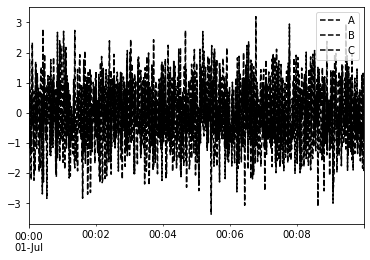

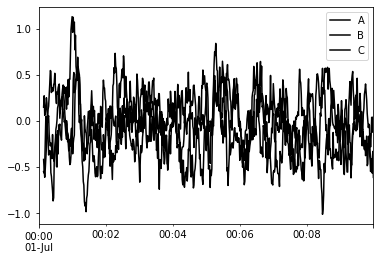

In [4]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [5]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

AttributeError: module 'pandas' has no attribute 'ewma'

In [6]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [7]:
df.head()

,A,B,C,D
2016-06-06,0.955347,-1.022017,0.916117,1.159774
2016-06-07,-0.703840,-0.136526,0.360784,-0.523510
2016-06-08,0.213249,-0.984454,-1.097067,2.597871
2016-06-09,-0.901102,-0.403424,-0.551043,-0.641331
2016-06-10,0.162622,-0.844961,1.069907,1.183899


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11a5e9760>,
      dtype=object)

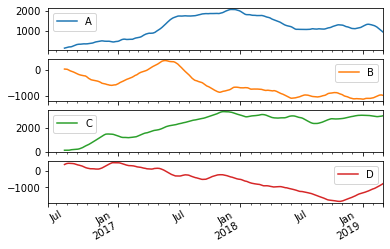

In [8]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [9]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
...,...,...,...,...
2019-02-26,0.445202,0.668031,1.076608,0.908619
2019-02-27,0.379716,0.833479,1.407476,0.903805
2019-02-28,0.506373,1.262625,1.578875,1.000615
2019-03-01,0.647337,1.537343,1.672120,1.038987


In [10]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,0.603427,-1.090280,1.096509,0.898019
2016-06-08,0.557203,-1.441186,0.790951,1.676724
2016-06-09,0.308816,-1.717494,0.500411,1.905744
2016-06-10,0.192308,-2.052272,0.540068,2.279936


In [11]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?

In [12]:
# EWMA
# Why use EWMA?

In [13]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [14]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting